In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import webdataset as wds
from glob import glob

In [2]:
# Path to webdataset shards
WDS_DIR = "../data/webdataset"

# List shards in each split
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(WDS_DIR, split)
    n_shards = len(glob(os.path.join(split_dir, "*.tar")))
    print(f"{split}: {n_shards} shards")

train: 37 shards
val: 5 shards
test: 5 shards


In [3]:
def plot_5ch_stack(stack, meta=None):
    """Plot a 5-channel image stack with metadata."""
    # 5 subplots (one per channel), side by side
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
    
    # Create title with metadata
    if meta:
        title = f"BROAD_ID: {meta['broad_id']}"
        if meta['compound_name']:
            title += f"\nCompound: {meta['compound_name']}"
        title += f"\nPlate: {meta['plate_id']}, Well: {meta['well']}, Site: {meta['site']}"
    else:
        title = "5-channel stack"
        
    fig.suptitle(title, fontsize=12, y=1.1)

    # Channels in order
    titles = ["DNA", "ER", "RNA", "AGP", "Mito"]

    for ax, img, title in zip(axes, stack, titles):
        # Show min/max in title
        ax.imshow(img, cmap="gray")
        ax.set_title(f"{title}\n(min={img.min():.3f}, max={img.max():.3f})")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

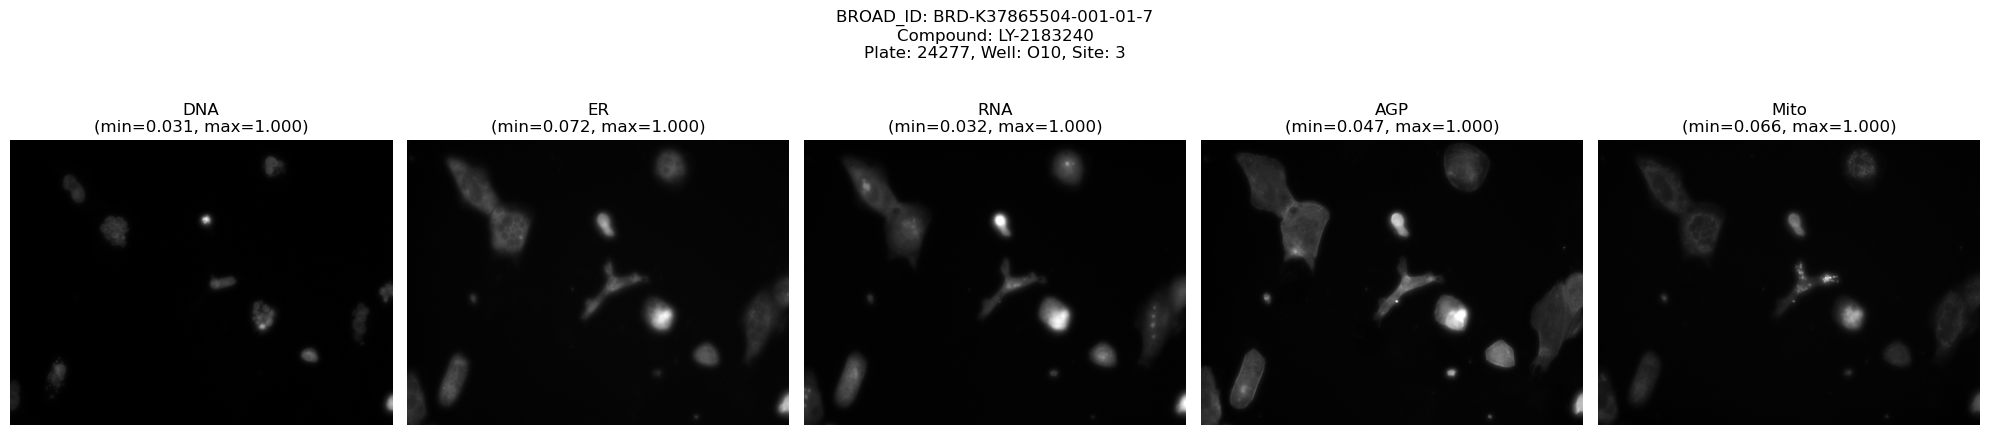


Metadata:
broad_id: BRD-K37865504-001-01-7
compound_name: LY-2183240
compound_type: common
smiles: CN(C)C(=O)n1nnnc1Cc1ccc(cc1)-c1ccccc1
plate_id: 24277
well: O10
site: 3

--------------------------------------------------



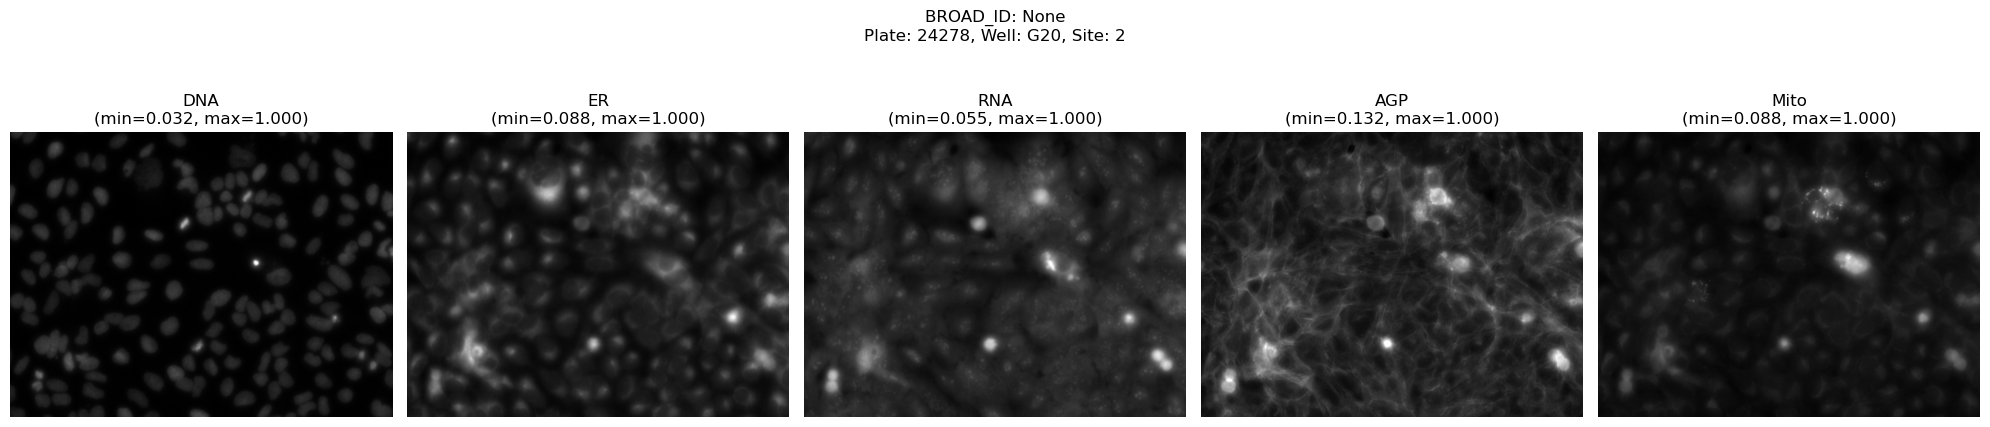


Metadata:
plate_id: 24278
well: G20
site: 2

--------------------------------------------------



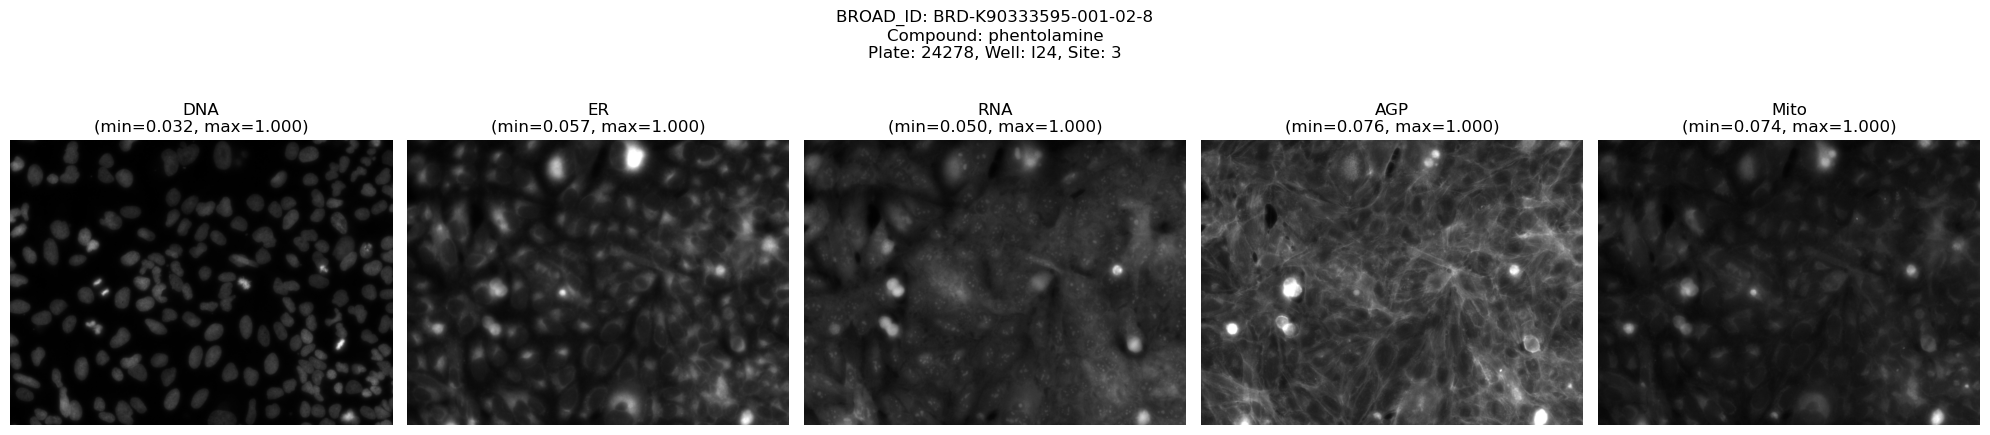


Metadata:
broad_id: BRD-K90333595-001-02-8
compound_name: phentolamine
compound_type: INN
smiles: Cc1ccc(cc1)N(CC1=NCCN1)c1cccc(O)c1
plate_id: 24278
well: I24
site: 3

--------------------------------------------------



In [11]:
val_pattern = f"{WDS_DIR}/val/shard_{{000001..999999}}.tar"
dataset = wds.WebDataset(val_pattern).decode()

for i, sample in enumerate(dataset):
    if i >= 3:
        break
        
    images = sample['images.npy']
    meta = sample['meta.json']
    
    plot_5ch_stack(images, meta)
    print("\nMetadata:")
    for k, v in meta.items():
        if v is not None:  # Only show non-None values
            print(f"{k}: {v}")
    print("\n" + "-"*50 + "\n")